
# The energy balance and the batch reactor



-   There are no flows in the batch reactor

-   The mole balances are

\begin{align}
\frac{dn_j}{dt} = r_j V
\end{align}

-   We assume the volume is constant and pressure is constant
    -   This is practically valid for liquid phase reactions and constant mole reactions

-   The energy balance becomes

\begin{align}
\sum N_j C_{p,j} \frac{dT}{dt} = - \sum H_j \alpha_j r V + \dot{W}_s + \dot{Q}
\end{align}

-   Recall that $\Delta H_{rx} = \sum \alpha_j H_j$

-   This leads to

\begin{align}
\sum N_j C_{p,j} \frac{dT}{dt} = - \Delta H_{rx} r V + \dot{W}_s + \dot{Q}
\end{align}



## Constant volume, adiabatic batch reactor



-   Let us consider a constant volume, adiabatic batch reactor
    -   Adiabatic means no heat enters or leaves the reactor, $\dot{Q} = 0$
    -   We will neglect any shaft work $\dot{W}_S=0$

-   We consider the reaction $A + B \rightarrow C$
    -   Since this is a liquid reaction, we assume constant pressure

-   The reaction mixture starts at 27 \degC with initial concentrations of $A$ and $B$ at 2 M, and no C

-   The heat of reaction is -10 kcal/mol

-   The partial molar heat capacities are $\overline{C}_{pA} = \overline{C}_{pB} = 20$ cal/(mol K) and  $\overline{C}_{pC} = 40$ cal/mol/K.

-   The rate constant is $k = 0.01725$ L/mol/min at 27 \degC and the activation energy is 1500 cal/mol/K

-   The reactor volume is 1200 L

-   We will neglect the temperature dependence of the rate constant and reaction enthalpy

-   We will assume the reaction is liquid phase and it is incompressible

-   We want to plot the temperature and concentration vs. time

-   Since the reactor is adiabatic $\dot{Q}=0$

-   We are left with this for the energy balance:

$$\frac{dT}{dt} =  \frac{-\Delta H_R\; r\; V_r}{ \sum N_i C_{p,i} } $$

-   We can relate the number of moles of $A$, $B$ and $C$ via the reaction extent and stoichiometry.



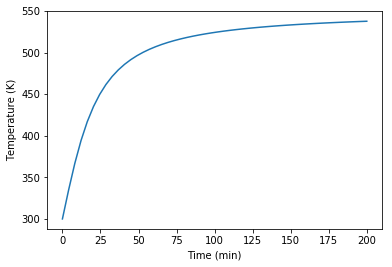

In [2]:
import numpy as np
from scipy.integrate import odeint

V = 1200.0 # L
T0 = 273.15 + 27
CA0 = CB0 = 2.0
CC0 = 0.0

# heat capacities
cpa = cpb = 20.0  # cal/mol/K
cpc = 40.0        # cal/mol/K

# rate constants
k0 = 0.01725      # L / mol / min at 27 degC
E = 1500.0        # cal/mol
R = 1.987         # cal/mol/K
dH = -10000.0     # cal/mol

def adiabatic_batch(Y, t):
    na, T = Y

    # extent based on moles
    xi = (na - CA0 * V) / -1.0
    nb = CB0 * V - xi
    nc = CC0 * V + xi

    # concentrations
    Ca = na / V
    Cb = nb / V

    # temperature dependent rate constant
    k = k0 * np.exp(-E / R * (1.0 / T - 1.0 / T0))
    r = k * Ca * Cb

    dnadt = -r * V

    # energy balance
    dTdt = -(dH * r * V)/(na * cpa + nb * cpb + nc * cpc)
    return [dnadt, dTdt]

# initial conditions
Y0 = [V * CA0, T0]

tspan = np.linspace(0, 200)
sol = odeint(adiabatic_batch, Y0, tspan)

import matplotlib.pyplot as plt
plt.plot(tspan, sol[:,1])
plt.xlabel('Time (min)')
plt.ylabel('Temperature (K)')
plt.show()


-   You can see that because of the exothermic reaction, the temperature increases signifcantly, from about 300K to almost 550 K.
    -   This increases the rate constant and the reaction rate

-   The temperature rise begins to slow because the reaction rate slows down due to consumption of reactants

-   Considering  a solvent like water would boil at about 373K there may be a safety concern here as the pressure would then start to significantly increase in the reactor




## Batch with heat exchanger



-   Let us reconsider the last example, but now add a heat exchanger.
    -   This could be as simple as immersing the batch reactor in a coolant that is well-stirred and at constant temperature
    -   Or it could be a heat exchanger immersed in the reactor

![img](./images/batch-reactor-heat-exchange.png)

-   Now $\dot{Q} \ne 0$
-   We need a model for the heat exchange
-   A common model is $\dot{Q} = Ua(T_{coolant} - T)$
    -   $Ua$ is an overall heat transfer coefficient with units energy / volume / time
    -   If $T > T_{coolant}$ there is loss of heat from the reactor
    -   We write the heat transfer this way so we can *add* $\dot{Q}$ in the energy balance

-   Let $UA = 5000$ cal/L/min, and the temperature of the coolant be 77 \degC

-   The energy balance becomes

$$\frac{dT}{dt} =  \frac{-\Delta H_R r V_r + Ua(T_{coolant} - T)}{ \sum n_i C_{p,i} } $$



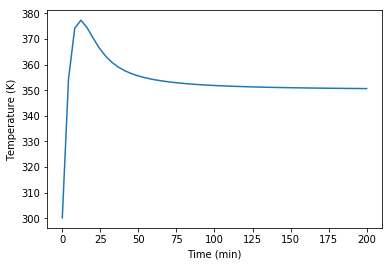

In [9]:
import numpy as np
from scipy.integrate import odeint

V = 1200.0 # L
T0 = 273.15 + 27
CA0 = CB0 = 2.0
CC0 = 0.0

cpa = cpb = 20.0  # cal/mol/K
cpc = 40.0        # cal/mol/K

k0 = 0.01725    # L / mol / min at 27 degC
E = 1500.0     # cal/mol
R = 1.987       # cal/mol/K
dH = -10000.0  # cal/mol

Ua = 20000 # overall heat transfer coefficient
Tcoolant = 77 + 273.15  # coolant temperature

def batch(Y, t):
    na, T = Y
    xi = (na - CA0*V) / -1.0
    nb = CB0 * V - xi
    nc = CC0 * V + xi

    Ca = na / V
    Cb = nb / V
    k = k0 * np.exp(-E / R * (1.0 / T - 1.0 / T0))
    r = k * Ca * Cb
    ra = -r

    Qdot = Ua*(Tcoolant - T)

    dnadt = ra * V
    dTdt = (-dH * r * V + Qdot)/(na * cpa + nb * cpb + nc * cpc)
    return [dnadt, dTdt]


Y0 = [V * CA0, T0]

tspan = np.linspace(0, 200)
sol = odeint(batch, Y0, tspan)
import matplotlib.pyplot as plt
plt.plot(tspan, sol[:,1])
plt.xlabel('Time (min)')
plt.ylabel('Temperature (K)')
plt.show()


-   Note that the temperature initially rises
    -   Partly because of the exothermic reaction occuring
    -   Partly because the initial temperature is lower than $T_{coolant}$ so there is heat transferred into the reactor

-   But it does not rise as quickly or as high as the adiabatic case

-   After a while the temperature begins to drop
    -   Because we are removing heat whenever $T > T_{coolant}$

-   Over time the temperature will approach $T_{coolant}$

-   We might still have to consider safety concerns here
    -   There is still a 100 K increase in temperature
    -   Using a heat exchanger with larger $Ua$ would help reduce that
    -   Using a lower temperature in the coolant would help that
    -   Using lower initial concentration would help that
    -   Diluting with a high heat capacity solvent would help that



# The energy balance and the CSTR

-   There are flows in the CSTR

-   The mole balance in a CSTR is

\begin{equation}
\frac{dN_j}{dt} = F_{j0} - F_j + r_j V = F_{j0} - F_j + \alpha_j r V
\end{equation}

-   Let us again assume constant pressure, and neglect shaft work

-   The beginning energy balance becomes

\begin{equation}
\sum N_j C_{p,j} \frac{dT}{dt} = -\sum H_j (F_{j0} - F_j + \alpha_j r V) + \sum F_{j0} H_{j0} - \sum F_j H_j + \dot{Q}
\end{equation}

-   With some rearrangement, and recognizing that
    -   $\Delta H_{rx} = \sum \alpha_j H_j $
    
    -   $H_{j0} - H_{j} = C_{p,j}(T_0 - T) $

-   We arrive at

\begin{equation}
\sum N_j C_{p,j} \frac{dT}{dt} = \sum F_{j0} C_{p,j} (T_0 - T) - \Delta H_{rx} r V + \dot{Q}
\end{equation}

-   At steady state, this simplifies to

\begin{equation}
0 = \sum F_{j0} C_{p,j} (T_0 - T) - \Delta H_{rx} r V + \dot{Q}
\end{equation}



Alternate derivation (being more explicit):

\begin{align}
\sum N_i C_{p,i} \frac{dT}{dt} + 
  V(1 - \alpha T) \frac{dP}{dt} + 
  \sum_j \overline{H}_j \frac{dn_j}{dt} &= \sum_j F_{j,in} \overline{H}_{j,in} - \sum_j F_{j,out} \overline{H}_{j,out} + \dot{W_s} + \dot{Q}\\
0&=\sum F_{j0} H_{j0} - \sum F_j H_j + \dot{Q} \\
0&=\sum F_{j0}H_{j0} - \sum F_j (H_{j0}+C_{p,j}(T-T_0)) + \dot{Q}\\
0&=\sum F_{j0}H_{j0} - \sum (F_{j0} + \alpha_j rV) (H_{j0}+C_{p,j}(T-T_0)) + \dot{Q}\\
0&=\sum F_{j0}H_{j0} - \sum [(H_{j0}+C_{p,j}(T-T_0))F_{j0} + \alpha_j rV(H_{j0}+C_{p,j}(T-T0))] + \dot{Q}\\
0&=\sum F_{j0}H_{j0} - \sum [(H_{j0}+C_{p,j}(T-T_0))F_{j0} + \alpha_j rVH_j] + \dot{Q}\\
0&=-\sum(C_{p,j}(T-T_0))F_{j0}-\sum \alpha_j rVH_j + \dot{Q}\\
0&=\sum(C_{p,j}(T_0-T))F_{j0}-\Delta H_{rxn} rV+ \dot{Q}
\end{align}


## Steady state adiabatic CSTR

-   Let us consider an adiabatic CSTR where a liquid phase isomerization occurs

\begin{equation}
A \rightarrow B
\end{equation}

-   We feed the reactor 163 kmol / hr of a mixture of 90% A and 10% inert C

-   The initial concentration of A is 9.3 mol / L at a feed temperature of 330 K

-   The equilibrium constant is 3.03 at 60 \degC

-   The reaction energy is -6.9 kJ / mol at 330K

-   The heat capacities are

<table border="2" cellspacing="0" cellpadding="6" rules="groups" frame="hsides">


<colgroup>
<col  class="org-left" />

<col  class="org-right" />
</colgroup>
<thead>
<tr>
<th scope="col" class="org-left">species</th>
<th scope="col" class="org-right">heat capacity (J/mol/K)</th>
</tr>
</thead>

<tbody>
<tr>
<td class="org-left">A</td>
<td class="org-right">141</td>
</tr>


<tr>
<td class="org-left">B</td>
<td class="org-right">141</td>
</tr>


<tr>
<td class="org-left">C</td>
<td class="org-right">161</td>
</tr>
</tbody>
</table>

-   the rate constant is 31.1 1/hr at 330 K, with an activation energy of 65.7 kJ/mol

-   We want to know the volume required to reach 70% conversion and the exit temperature.

-   We will solve the mole balance and energy balance simultaneously

-   The mole balance is the same as before

\begin{equation}
0 = F_{A0} - F_A + r_A V
\end{equation}

-   The energy balance in this case is

\begin{equation}
0 = \sum F_{j0} C_{p,j} (T_{feed} - T) - \Delta H_{rx}(T) r V
\end{equation}


In [14]:
import numpy as np

R = 8.314e-3      # gas constant kJ/mol/K

Hrx = -6.900      # Reaction enthalpy kJ/mol at 330 K

Tfeed = 330.0     # Feed temperature in K
k1 = 31.1         # Rate constant at 360 K
T1 = 360.0        # Reference T for the rate constant
E = 65.7          # Activation energy
Kc1 = 3.03        # at 60degC
T2 = 273.15 + 60  # Reference T for the equilibrium constant

Cao = 9300.0      # initial concentration mol / m**3
Fto = 163000.0    # Total molar feed rate mol / hour
Fao = 0.9 * Fto   # inlet molar flow of A
Fbo = 0.0 * Fto
Fio = 0.1 * Fto

CpA = 0.141       # heat capacity kJ / mol / K
CpB = 0.141
dCp = CpB - CpA   # change in heat capacity due to reaction

CpI = 0.161

X = 0.7           # fractional conversion
Ca = Cao * (1.0 - X)
Cb = Cao * X

Fa = Fao * (1.0 - X)

def objective(Y):
    V, T = Y  # unpack the variables

    # Calculate reaction energy at reaction conditions
    Hrxn = Hrx + dCp * (T - Tfeed)

    k = k1 * np.exp(-E / R * (1.0 / T - 1.0 / T1))
    Kc = Kc1 * np.exp(-Hrxn / R * ( 1.0 / T - 1.0 / T2))

    r = k * (Ca - Cb / Kc)
    ra = -r
    # mole balance
    z1 = Fao - Fa + ra * V

    # energy balance
    z2 = (Fao * CpA + Fbo * CpB + Fio * CpI) * (Tfeed - T) + (-Hrxn * r * V)
    return [z1, z2]

from scipy.optimize import fsolve

V, Texit = fsolve(objective, [16.42, 360])
print('Volume = {0:1.2f} m^3'.format(V))
print('The exit temperature is {0:1.2f} K'.format(Texit))

Volume = 16.43 m^3
The exit temperature is 360.40 K


-   You can see that the exit stream is hotter than the feed temperature
    -   That is because the reaction is mildly exothermic, so heat is generated
    -   The reactor is adiabatic, so the temperature goes up

-   Note that this was an exothermic, reversible reaction

-   We should have checked if a conversion of 70% is even possible



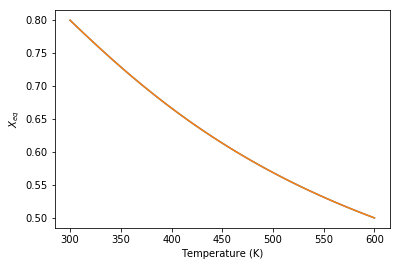

In [6]:
import numpy as np
import matplotlib.pyplot as plt

Hrx = -6.9   # kJ / mol
R = 8.314e-3
K_ref = 3.03
T_ref = 273.15 + 60

T = np.linspace(300, 600)

K = K_ref * np.exp(-Hrx / R * (1.0 / T - 1.0 / T_ref))

Xeq = K / (1.0 + K)

plt.plot(T, Xeq)
plt.xlabel('Temperature (K)')
plt.ylabel('$X_{eq}$')
plt.show()

-   You can see that a conversion of 70% is only possible below a temperature of about 360 K

-   The equations we solve are nonlinear, and it is not obvious there is only one solution

